In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

## Slicing `Stream` object into daily `Trace` objects

The data used in this exercise consist of 1 month recording from two stations: MLAC and PHL.  
We would like to read both data and store it in one `Stream` object, namely `stn`

In [2]:
from obspy import read
st1 = read("/home/yongki/D/IMGW/Database/CI.MLAC..BHZ-2002-01.miniseed", format="mseed")
st1 = st1[3:5]
st2 = read("/home/yongki/D/IMGW/Database/CI.PHL..BHZ-2002-01.miniseed", format="mseed")
st2 = st2[19:21]

In [3]:
stn = st1
stn += st2

In [4]:
print(stn.__str__(extended=True))

4 Trace(s) in Stream:
CI.MLAC..LHZ | 2002-01-01T00:00:01.806800Z - 2002-01-22T20:57:12.806800Z | 1.0 Hz, 1889832 samples
CI.MLAC..LHZ | 2002-01-22T21:11:43.806800Z - 2002-01-31T23:59:57.806800Z | 1.0 Hz, 787695 samples
CI.PHL..LHZ  | 2002-01-01T00:00:01.673300Z - 2002-01-22T20:57:45.673300Z | 1.0 Hz, 1889865 samples
CI.PHL..LHZ  | 2002-01-22T21:11:34.673100Z - 2002-01-31T23:59:57.673100Z | 1.0 Hz, 787704 samples


Now, we will slice our data into 1-day long `Trace` object and save it to our local storage.  
The code below will automatically store our new `Trace` object with time ranging from [T00:00:01-T23:59:59]  
If we found discontinued data just like ours, the code will adjust automatically the `starttime` and `endtime` for each Trace object

In [5]:
from obspy.core import UTCDateTime

stp = stn.copy()
chunklength = 86400

for tr in stp:
    starttime = tr.stats.starttime
    endtime = tr.stats.endtime
    if starttime.minute != 0:
        endtime_new = UTCDateTime(starttime.year, starttime.month, starttime.day, 23, 59, 59)
        trnew = tr.slice(starttime, endtime_new)
        trnew.write("/home/yongki/D/IMGW/Database/"+tr.stats.station+"."+str(trnew.stats.starttime)+
                        ".mseed", format="mseed")
        starttime = UTCDateTime(starttime.year, starttime.month, starttime.day+1, 0, 0, 1)
        while starttime < endtime:
            trnew = tr.slice(starttime, UTCDateTime(min(starttime + chunklength, endtime)))
            trnew.write("/home/yongki/D/IMGW/Database/"+tr.stats.station+"."+str(trnew.stats.starttime)+
                        ".mseed", format="mseed")
            starttime += chunklength
    else:
        while starttime < endtime:
            trnew = tr.slice(starttime, UTCDateTime(min(starttime + chunklength, endtime)))
            trnew.write("/home/yongki/D/IMGW/Database/"+tr.stats.station+"."+str(trnew.stats.starttime)+
                        ".mseed", format="mseed")
            starttime += chunklength

We can compare our original data and the sliced data by plotting both seismogram

In [6]:
stx = read("/home/yongki/D/IMGW/Database/*.mseed", format="mseed")

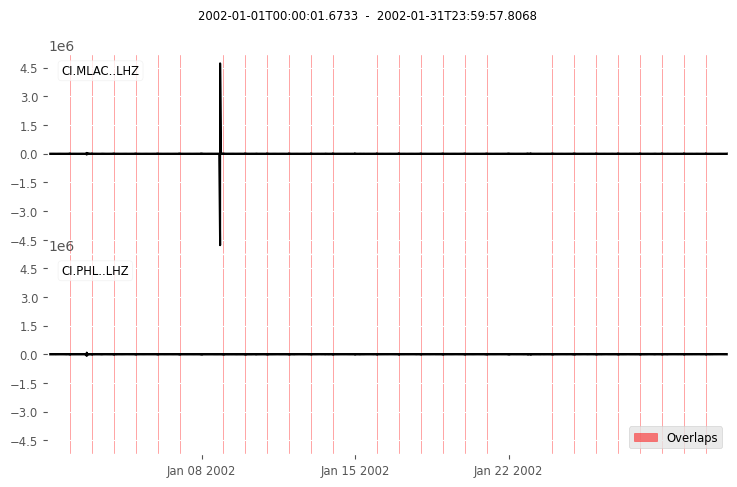

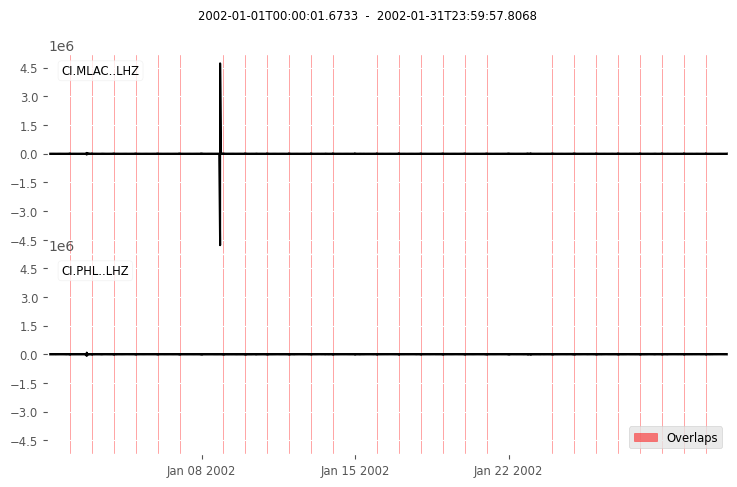

In [7]:
stx.plot()

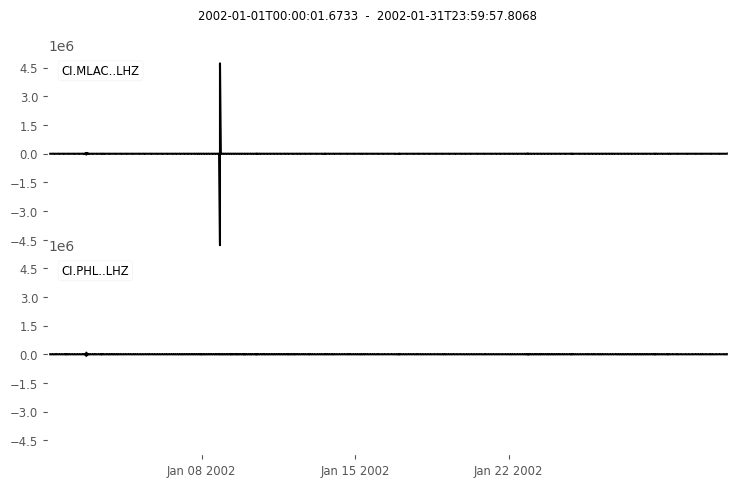

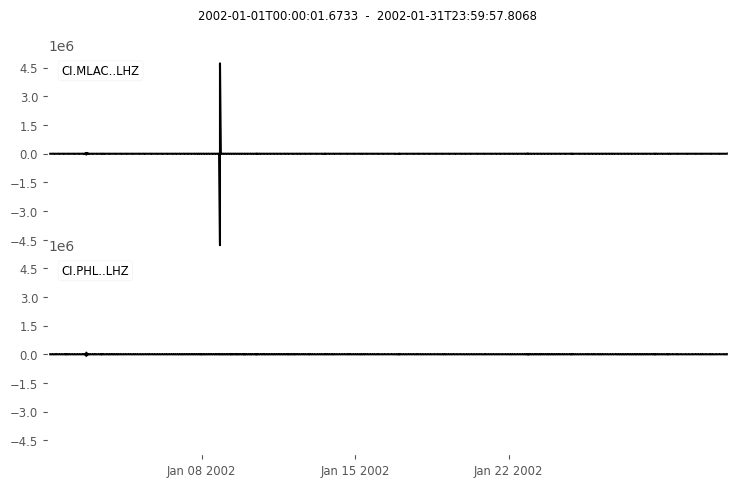

In [8]:
stn.plot()